### 安装 <a href="http://tushare.org/index.html">tushare</a> 
    pip install tushare
 

In [56]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as tl
import pandas as pd
import datetime as dt


df = ts.get_k_data('002408', ktype='60',autype="qfq",index=False)

 


#RSI
df["rsi"] = tl.RSI(df['close'].values, timeperiod=9)
df["macd"],df["signal"],df["hist"] = tl.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)



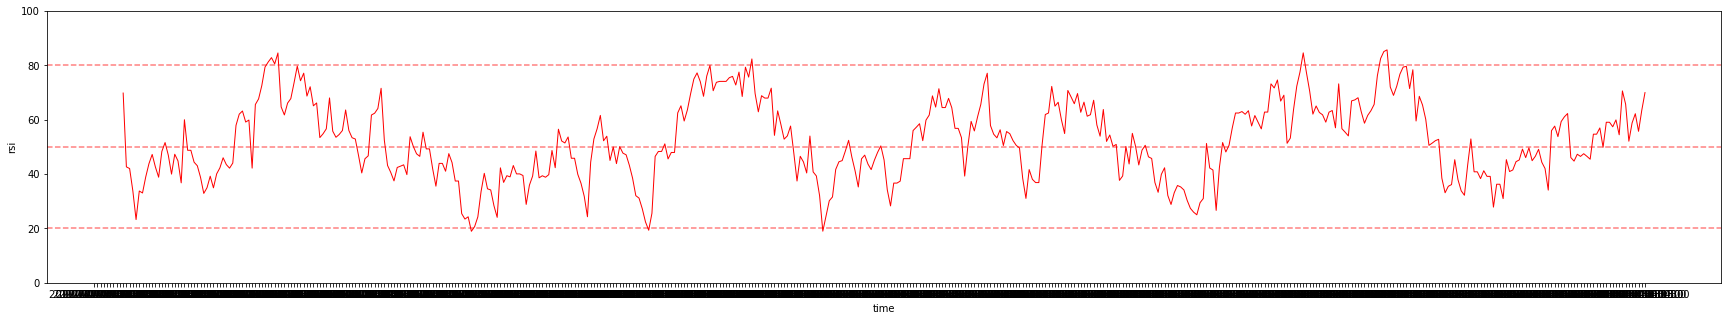

In [57]:
#绘制RSI线图
 
fig, ax = plt.subplots(figsize=(30,5))
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')

#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))

plt.plot(df["date"],df["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 

rsi_Low= rsi[rsi<rsi.shift(3)][rsi<rsi.shift(2)][rsi<rsi.shift(1)][rsi<rsi.shift(-1)][rsi<rsi.shift(-2)][rsi<rsi.shift(-3)] 
rsi_Low = rsi_Low.dropna()



In [ ]:
df = ts.get_tick_data('002408',date='2018-05-14')
df.head(100)

df = ts.get_realtime_quotes('002408') #Single stock symbol
df[['code','name','price','bid','ask','volume','amount','time']]

df = ts.get_today_ticks('002408')
df.head(10)